In [1]:
#Import necessary libraries for data analysis

import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Classification and Evaluation Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset

df = pd.read_csv("C:\\Users\\User2\\Downloads\\Customer-Churn - Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
#checking the dimensionality

rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 7043
Number of columns: 21


In [5]:
#checking the dataset for anomalies

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#checking the descriptive statistic of the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# statistical description of categorical features

df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [8]:
# check for duplicated values

dup = df.duplicated().sum()
print("Number of duplicates:", dup)

Number of duplicates: 0


In [9]:
# check for null values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Data Wrangling

In [10]:
# removal of rows with missing data

df.dropna(inplace=True)

In [11]:
# Updating wrongly labeled data points: some data cells has 'No phone service' and 'No internet service' instead of 'No' 

column_update = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Looping through columns and replace 'No phone service' and 'No internet service' with 'No'
for c in column_update:
    df[c] = df[c].replace('No phone service', 'No')
    df[c] = df[c].replace('No internet service', 'No')

In [12]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### PERFORMING UNIVARATE ANALYSIS

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

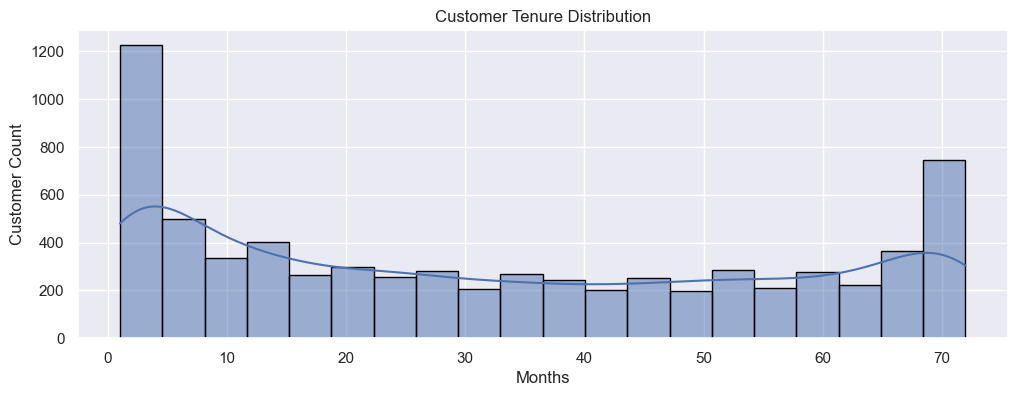

In [14]:
# Distribution of customer tenure

plt.figure(figsize=(12,4))
sns.histplot(df['tenure'], edgecolor='black', bins=20, kde=True)
plt.title('Customer Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Customer Count');

Skewness of MonthlyCharges: -0.22


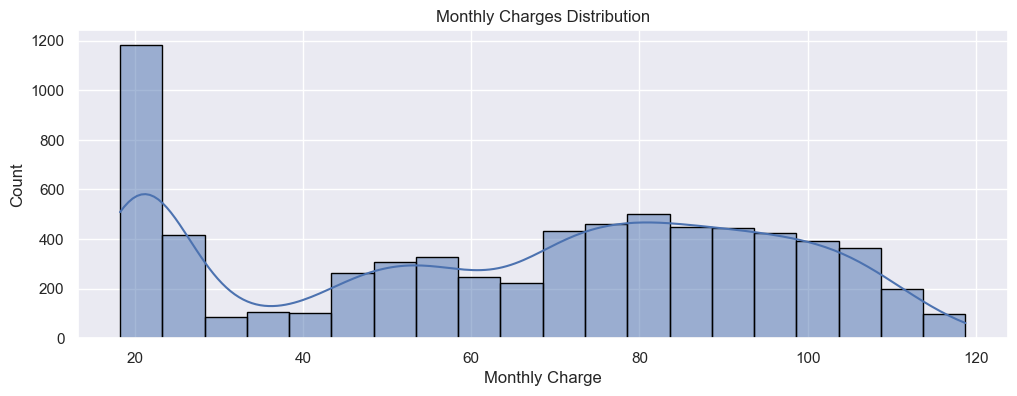

In [15]:
# Distribution of monthly charges

plt.figure(figsize=(12,4))
sns.histplot(df['MonthlyCharges'], edgecolor='black', bins=20, kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('Count');

# Calculate the skewness of the MonthlyCharges
monthly_charges_skewness = skew(df['MonthlyCharges'])
print(f"Skewness of MonthlyCharges: {monthly_charges_skewness:.2f}")

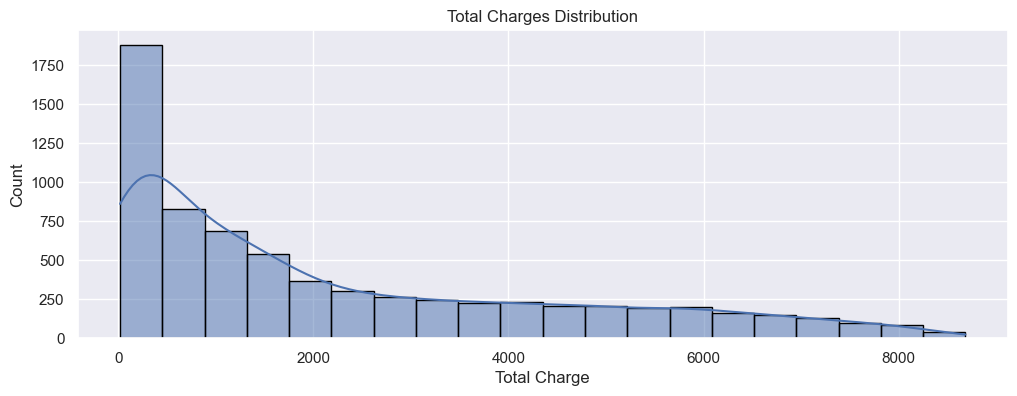

In [16]:
# Distribution of total charges

plt.figure(figsize=(12,4))
sns.histplot(df['TotalCharges'], edgecolor='black', bins=20, kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charge')
plt.ylabel('Count');


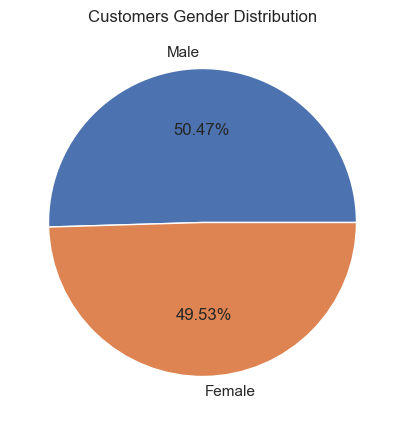

In [17]:
# Customers gender distribution

plt.figure(figsize=(5,5))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Customers Gender Distribution');

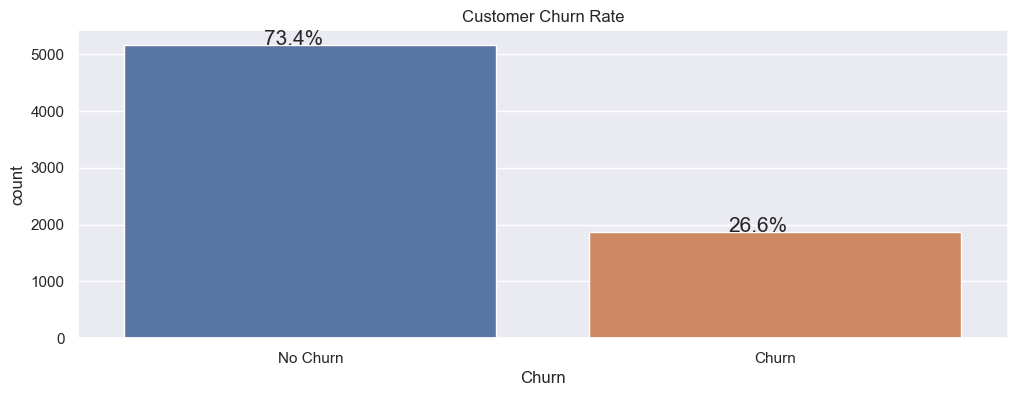

In [18]:
# Count of customer churn

plt.figure(figsize=(12,4))
ax = sns.countplot(data=df, x='Churn')
plt.title('Customer Churn Rate')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

# Percentage calculation

total = float(len(df['Churn']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15) 

## Bivariate Analysis

Mean Monthly Charges for Churned Customers: 74.44
Mean Monthly Charges for Retained Customers: 61.31


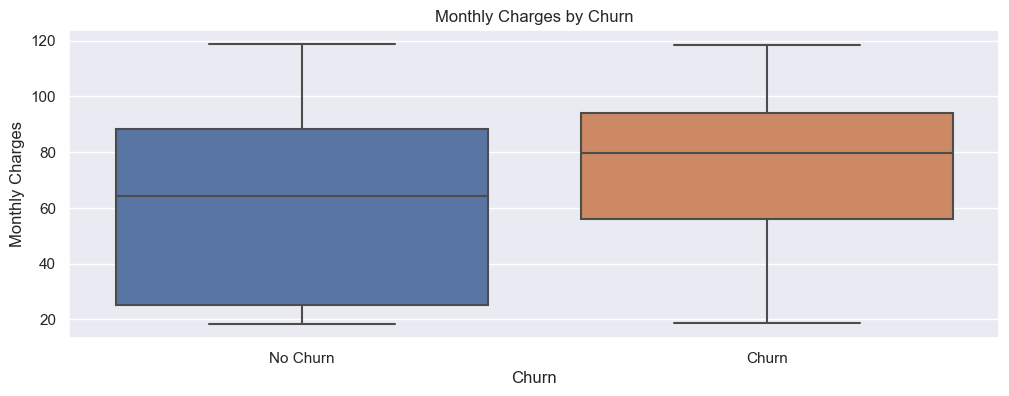

In [19]:
# Monthly charges distribution by customer churn

plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

# Mean of monthly charges for churned and retained customers

mean_monthly_charges_churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
mean_monthly_charges_retained = df[df['Churn'] == 'No']['MonthlyCharges'].mean()
print(f"Mean Monthly Charges for Churned Customers: {mean_monthly_charges_churned:.2f}")
print(f"Mean Monthly Charges for Retained Customers: {mean_monthly_charges_retained:.2f}")

  Churn  MonthlyCharges
0    No       316530.15
1   Yes       139130.85


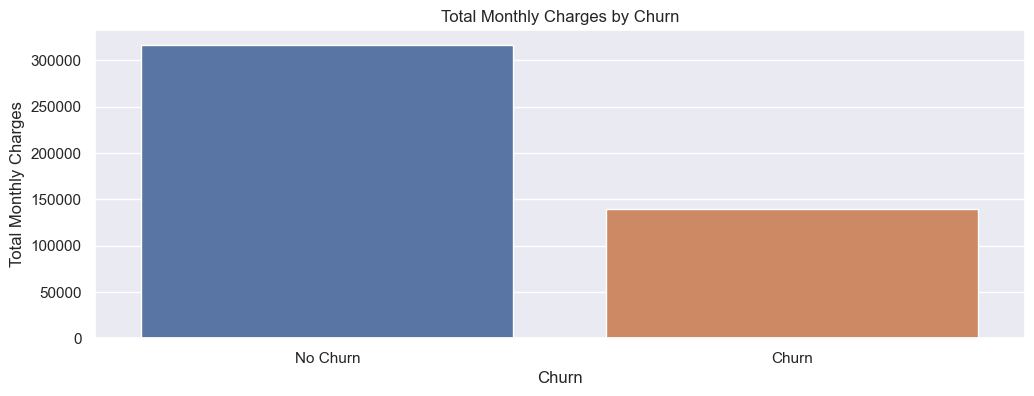

In [20]:
# Calculation of sum monthly charges by customer churn

monthly_charges_by_churn = df.groupby('Churn')['MonthlyCharges'].sum().reset_index()
print(monthly_charges_by_churn)

# visualisation of Total Monthly Charges by Churn

plt.figure(figsize=(12, 4))
sns.barplot(x='Churn', y='MonthlyCharges', data=monthly_charges_by_churn)
plt.ylabel('Total Monthly Charges')
plt.title('Total Monthly Charges by Churn')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

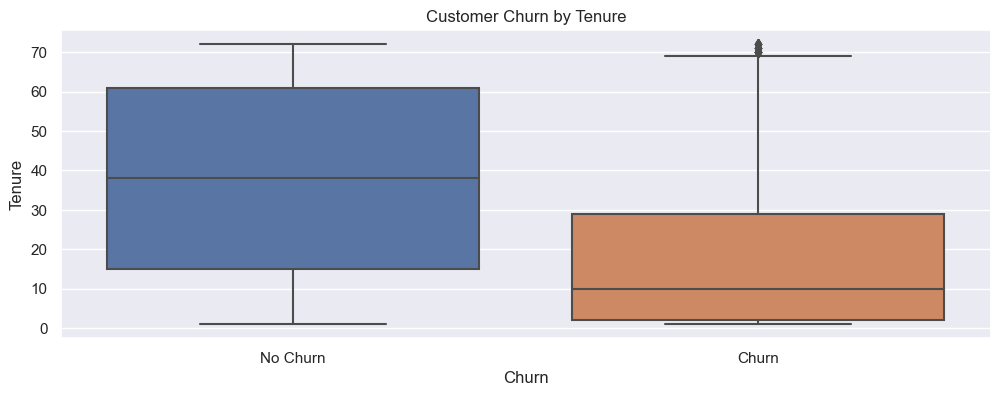

In [21]:
# Customer churn by Tenure

plt.figure(figsize=(12 ,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Customer Churn by Tenure')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

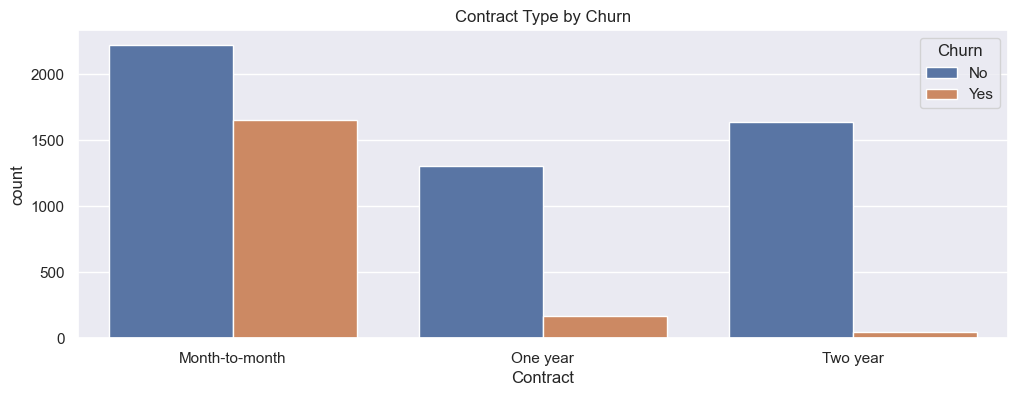

In [22]:
# Customer Contract Type by Churn

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.xlabel('Contract')
plt.title('Contract Type by Churn');

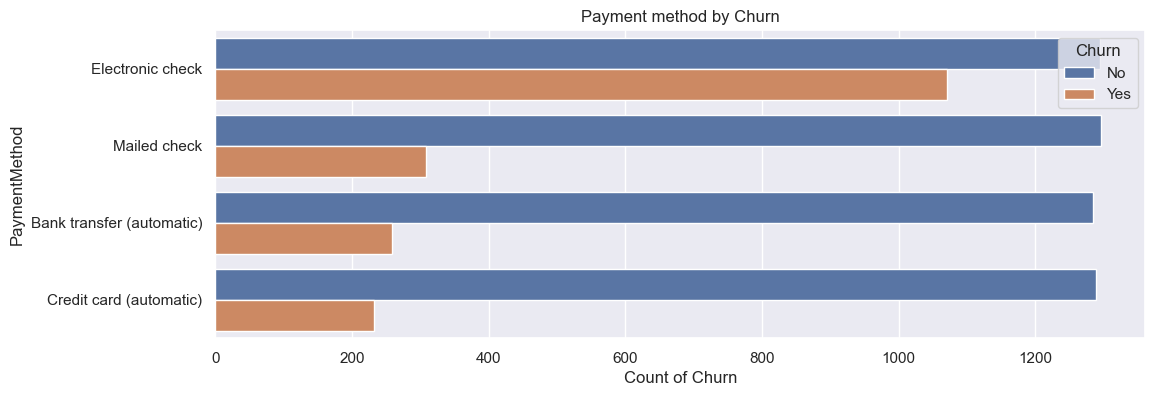

In [23]:
# Payment method by Customer Churn

plt.figure(figsize=(12,4))
sns.countplot(data=df, y='PaymentMethod', hue='Churn')
plt.xlabel('Count of Churn')
plt.title('Payment method by Churn');

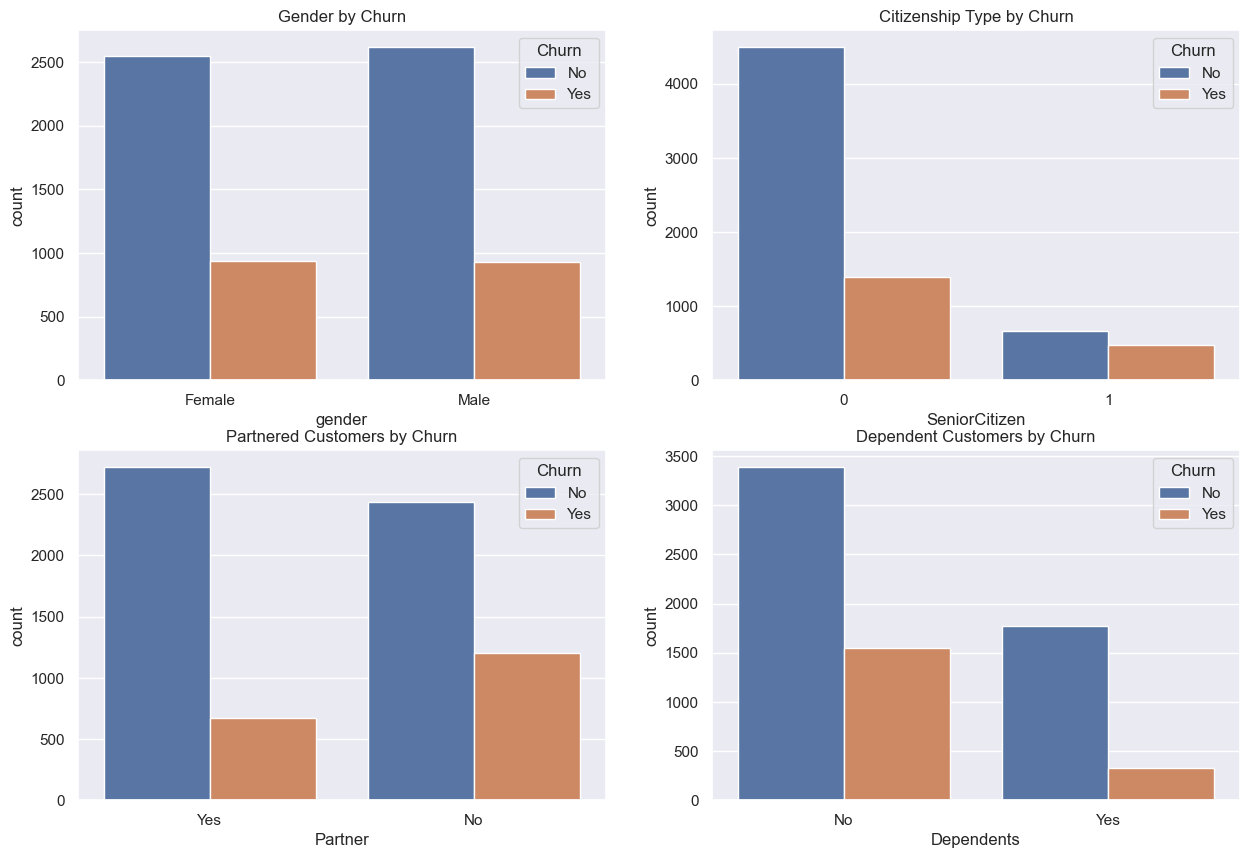

In [24]:
# Customer Demographics by Churn
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Gender Distribution by Churn
sns.countplot(data=df, x='gender', hue='Churn', ax=axs[0,0])
axs[0,0].set_title('Gender by Churn')

# Citizenship Type by Churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axs[0,1])
axs[0,1].set_title('Citizenship Type by Churn')

# Customer relationship by Churn
sns.countplot(data=df, x='Partner', hue='Churn', ax=axs[1,0])
axs[1,0].set_title('Partnered Customers by Churn')

# Customer dependency by Churn
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axs[1,1])
axs[1,1].set_title('Dependent Customers by Churn');

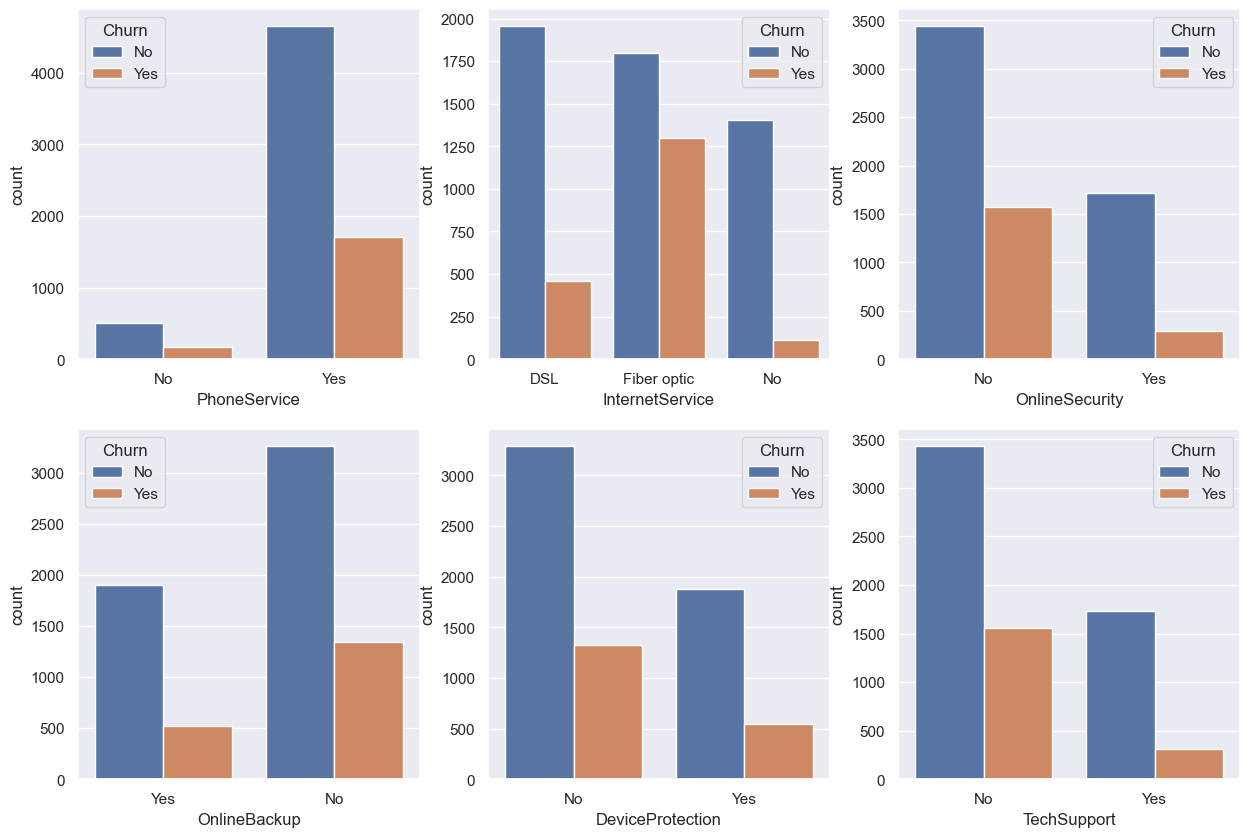

In [25]:
# Services offered to Customers by Churn
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Phone Service by Churn
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=axs[0,0])

# Internet Service by Churn
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axs[0,1])

# Online Security Service by Churn
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=axs[0,2])

# Online Backup Service by Churn
sns.countplot(data=df, x='OnlineBackup', hue='Churn', ax=axs[1,0])

# Device Protection Service by Churn
sns.countplot(data=df, x='DeviceProtection', hue='Churn', ax=axs[1,1])

# Tech Support Service by Churn
sns.countplot(data=df, x='TechSupport', hue='Churn', ax=axs[1,2]);

## Data Preprocessing

In [26]:
# Droping of 'customer id' column

df.drop(columns='customerID', axis=1, inplace=True)

In [27]:
# Encoding of categorical columns into numerical

# columns for label encoding
le_columns = ['Contract', 'Churn']

# columns for one-hot encoding
oh_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


# Fit_transform variables using Label Encoder
label_encoder = LabelEncoder()
for col in le_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Fit_transform variables using One-Hot Encoder
onehot_encoder = OneHotEncoder(sparse=False)
nominal_encoded = onehot_encoder.fit_transform(df[oh_columns])

# Create a DataFrame for one-hot encoded columns with the same index as the original DataFrame
oh_encoded_df = pd.DataFrame(nominal_encoded, columns=onehot_encoder.get_feature_names_out(oh_columns), index=df.index)

# Drop the original columns used for one-hot encoding
df = df.drop(columns=oh_columns)

# Concatenate the one-hot encoded columns to the DataFrame
df = pd.concat([df, oh_encoded_df], axis=1)

df.head(2)

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,29.85,29.85,0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,1,56.95,1889.50,0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Segmentation of dataset into predictor variables (x) and target variables (y)

x = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [29]:
# Scaling of predictor variables

# Initialize scaler and fit-tranform data using scaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [30]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, train_size=0.7, random_state=42)

## Model Building

In [31]:
# Logistic Regression 
lr = LogisticRegression()        # instantiate model
lr.fit(X_train, y_train)         # fit model on training set
lr_pred = lr.predict(X_test)     # model prediction

# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

## Model Evaluation

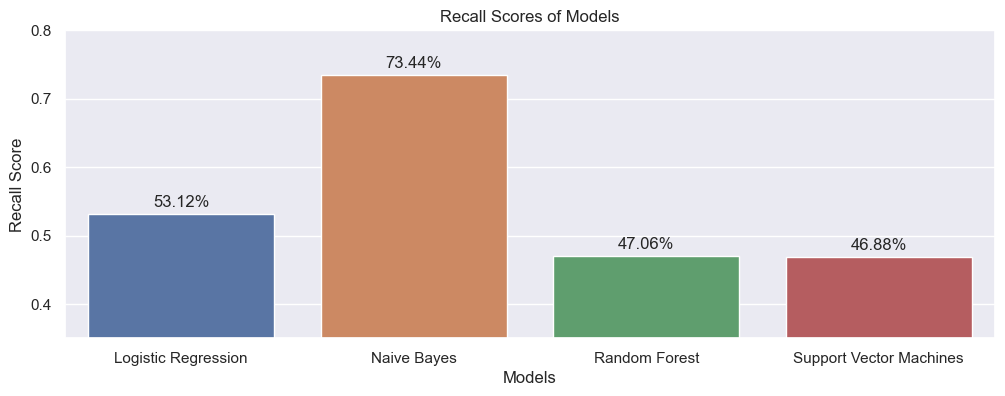

In [32]:
# Recall Scores
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machines']
recall_scores = [recall_score(y_test,lr_pred), recall_score(y_test,nb_pred), recall_score(y_test,rf_pred), recall_score(y_test,svc_pred)]

plt.figure(figsize=(12,4))
sns.barplot(x=models, y=recall_scores)

# Adding percentage labels 
for i, score in enumerate(recall_scores):
    plt.text(i, score + 0.01, f'{score*100:.2f}%', ha='center')

plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Recall Scores of Models')
plt.ylim(0.35, .8); 

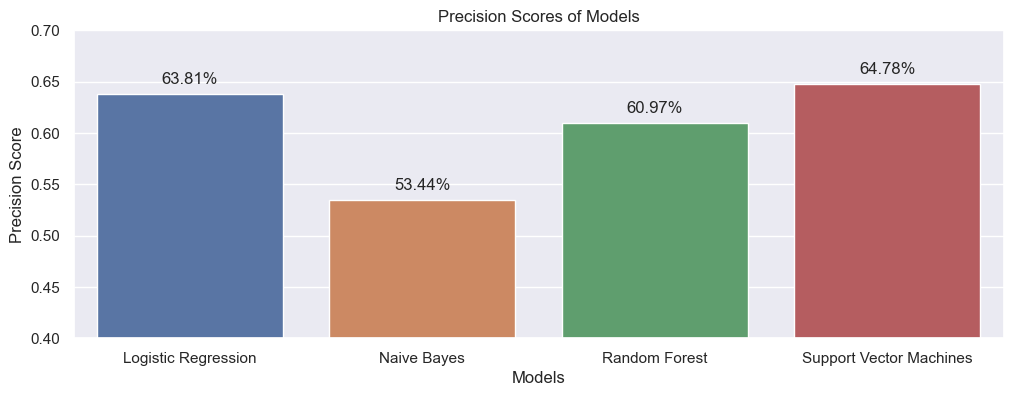

In [33]:
# Precision Scores
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machines']
precision_scores = [precision_score(y_test,lr_pred), precision_score(y_test,nb_pred), precision_score(y_test,rf_pred),  
                    precision_score(y_test,svc_pred)]

plt.figure(figsize=(12,4))
sns.barplot(x=models, y=precision_scores)

# Adding percentage labels 
for i, score in enumerate(precision_scores):
    plt.text(i, score + 0.01, f'{score*100:.2f}%', ha='center')

plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Precision Scores of Models')
plt.ylim(0.4, .7); 

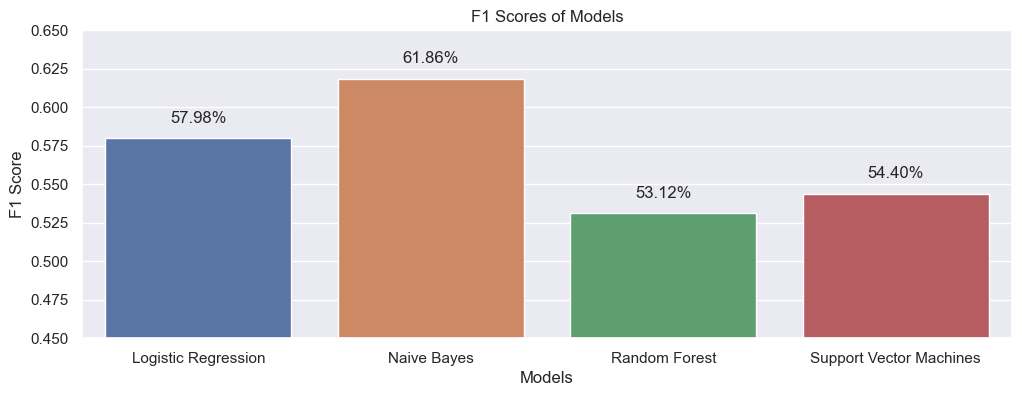

In [34]:
# F1 Scores
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machines']
f1_scores = [f1_score(y_test,lr_pred), f1_score(y_test,nb_pred), f1_score(y_test,rf_pred), f1_score(y_test,svc_pred)]

plt.figure(figsize=(12,4))
sns.barplot(x=models, y=f1_scores)

# Adding percentage labels 
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score*100:.2f}%', ha='center')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Models')
plt.ylim(0.45, .65);

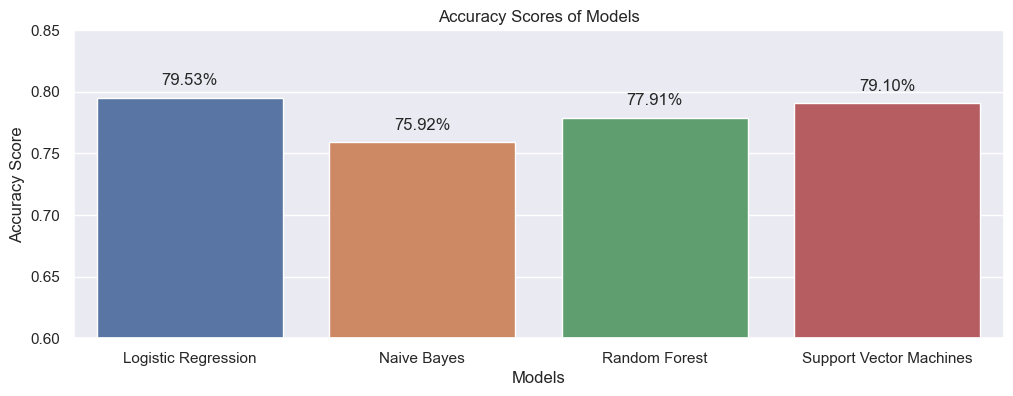

In [35]:
# Accuracy Scores
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machines']
accuracy_scores = [accuracy_score(y_test,lr_pred), accuracy_score(y_test,nb_pred), accuracy_score(y_test,rf_pred), accuracy_score(y_test,svc_pred)]

plt.figure(figsize=(12,4))
sns.barplot(x=models, y=accuracy_scores)

# Adding percentage labels 
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score*100:.2f}%', ha='center')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Models')
plt.ylim(0.6, .85); 

## Hyperparameters tuning

In [36]:
# Logistic Regression
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet', None]}

grid_search = GridSearchCV(lr, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.6491368173810923, for {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [37]:
# Naive Bayes
param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}

grid_search = GridSearchCV(nb, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.7760657662947739, for {'var_smoothing': 1.0}


In [38]:
# Random Forest
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(rf, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.5291192014092777, for {'max_depth': 10, 'n_estimators': 50}


In [39]:
# Support Vector Machines
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto', 0.1, 1]}

grid_search = GridSearchCV(svc, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.5421374045801526, for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


## Building and Evaluating Model using Naive Bayes (tuned hyperparameter)

Classification Report: Naive Bayes Model
----------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.51      0.78      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.80      0.74      0.76      2110



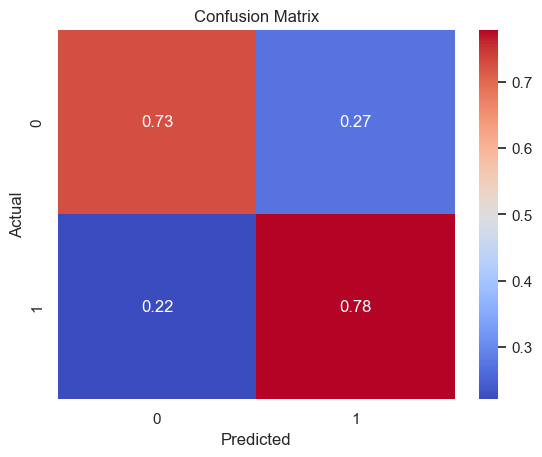

In [40]:
nb_tuned = GaussianNB(var_smoothing= 1.0)
nb_tuned.fit(X_train, y_train)
nb_tuned_pred = nb_tuned.predict(X_test)

print('Classification Report: Naive Bayes Model')
print('----------------------------------------')
print(classification_report(y_test, nb_tuned_pred))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, nb_tuned_pred, normalize='true'), annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted');

Key Findings:
1. Customer Churn Rate: ConnectTel experiences a churn rate of 26.6%, equating to the departure of about 3 out of every 10 customers.
2. Revenue Impact: The departure of customers leads to the loss of roughly one-third of the monthly recurring revenue, totaling $139,130.85. Notably, high-paying customers are more susceptible to churn than their low-paying counterparts.
3. Customer Tenure Distribution: ConnectTel's customer base is predominantly divided into two categories: those who are new and those who have been with the company for a long time. Churn is more prevalent among newer customers than among the established ones.
4. Contract Length: Customers who are on month-to-month contracts exhibit approximately 8 times the likelihood of churning in comparison to those on longer-term contracts lasting 1 or 2 years.
5. Payment Methods: Churn rates are higher among customers who utilize the Electronic Check payment method when compared to other payment methods.
6. Demographics: Gender has a negligible impact on churn, as customers are equally distributed between genders. However, senior citizens experience proportionally higher churn, while partnered and dependent customers have lower churn rates.
7. Phone and Internet Services: The presence of phone service has a minimal influence on churn, regardless of its availability. In contrast, customers using Fibre Optic internet service display a notably high churn rate of over 70%, surpassing both DSL and no internet service categories.
8. Support Services: Customers who utilize support services such as Online Security, Online Backup, Device Protection, and Tech Support tend to experience lower churn rates compared to those who do not use such services.

Churn Prediction System:
ConnectTel has developed a robust churn prediction system employing the Naive Bayes algorithm along with other machine learning techniques. The system encompasses:
- Data Preprocessing and Feature Engineering
- Exploratory Data Analysis
- Model Construction, Tuning, and Evaluation
This prediction system exhibits a recall score of 78%, which signifies its ability to identify approximately 4 out of every 5 customers who are likely to churn. This predictive capability is expected to contribute to the reduction of churn and the associated revenue loss.